# Redes Complejas 

## Trabajo Práctico 1

In [1]:
# Imports

import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_palette('dark')

### `Stanford.adjlist`

In [2]:
stanford = nx.read_adjlist('datos_tp1/StanfordBerkeleyWeb.adjlist',comments='%')

Para hacer este análisis de escala, lo que tenemos que hacer es ir sampleando diferentes subgrafos, de tamaño variable e ir computando los tiempos del betweenness y la proximidad. 

In [65]:
size_subgrafos =[10,20,50,
                 100,200,500,
                 1000,2000,5000,
                 10000]
nodes = list(stanford.nodes)
samples = [nodes[:size] for size in size_subgrafos]

subgrafos = [stanford.subgraph(nodes) for nodes in samples]

# También podríamos medir en el grafo completo
#size_subgrafos.append(len(nodes))
#ubgrafos.append(stanford)

In [88]:
#import time

#times_betweenness = []
#times_closeness = []

#betweenness_data = []
#closeness_data = []

#for i,subgraph in enumerate(subgrafos):
#    print("Tamaño de grafo:",size_subgrafos[i],'nodos')
    
#   print('Calculamos betweenness')
#   start = time.time()
#   foo = nx.betweenness_centrality(subgraph)
#   end = time.time()
#   print('Tiempo:',end-start)
#   times_betweenness.append(end-start)
#   betweenness_data.append(foo)
    
#   print('Calculamos proximidad')
#   start = time.time()
#   foo = nx.closeness_centrality(subgraph)
#   end = time.time()
#   print('Tiempo:',end-start)
#   times_closeness.append(end-start)
#   closeness_data.append(foo)
    
#   print('Listo\n'

In [67]:
# Salvamos datos para no correr todo de nuevo
import pickle
with open('stanford_data/betw_data.data','wb') as open_file:
    pickle.dump(betweenness_data,open_file)
with open('stanford_data/betw_times.data','wb') as open_file:
    pickle.dump(times_betweenness,open_file)
with open('stanford_data/clos_data.data','wb') as open_file:    
    pickle.dump(closeness_data,open_file)
with open('stanford_data/clos_times.data','wb') as open_file:
    pickle.dump(times_closeness,open_file)

Vamos a ajustar sobre los datos de tiempos leyes de potencia tipo

$$ t(N) = t_0 N^\gamma$$

siendo $t$ el tiempo requerido para calcular, y $N$ el tamaño del subgrafo (medido en cantidad de nodos). Los parámetros de ajuste son la constante de proporcionalidad $t_0$ y el exponente $\gamma$.

In [70]:
# Intentemos ajustar una ley de potencia sobre estos datos

def power_law(X,a,gamma):
    return a *(X**gamma)

from scipy.optimize import curve_fit

p0_btw,pcov_btw = curve_fit(power_law,size_subgrafos,times_betweenness)
p0_clo,pcov_clo = curve_fit(power_law,size_subgrafos,times_closeness)

In [73]:
X = np.linspace(0,10000,10000)

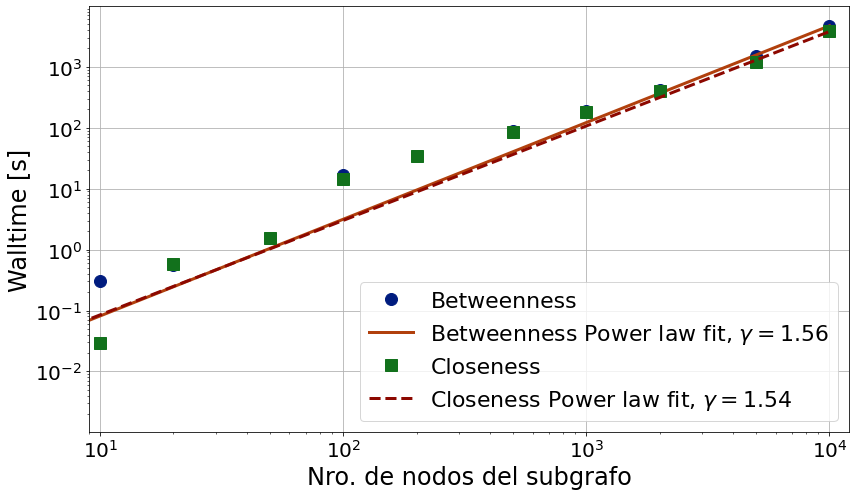

In [87]:
plt.figure(figsize=(12,7))

plt.plot(size_subgrafos,times_betweenness,'o',markersize=12,linewidth=2,label='Betweenness')
plt.plot(X,power_law(X,*p0_btw),linewidth=3,label='Betweenness Power law fit, $\\gamma=1.56$')

plt.plot(size_subgrafos,times_closeness,'s',markersize=12,linewidth=2,label='Closeness')
plt.plot(X,power_law(X,*p0_clo),'--',linewidth=3,label='Closeness Power law fit, $\\gamma=1.54$')

plt.xlabel('Nro. de nodos del subgrafo',size=24)
plt.ylabel('Walltime [s]',size=24)

plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=22)

plt.xscale('log')
plt.yscale('log')
plt.xlim([9,12000])

plt.grid()

plt.tight_layout()

In [89]:
degree_data = [nx.degree(subgraph) for subgraph in subgrafos]

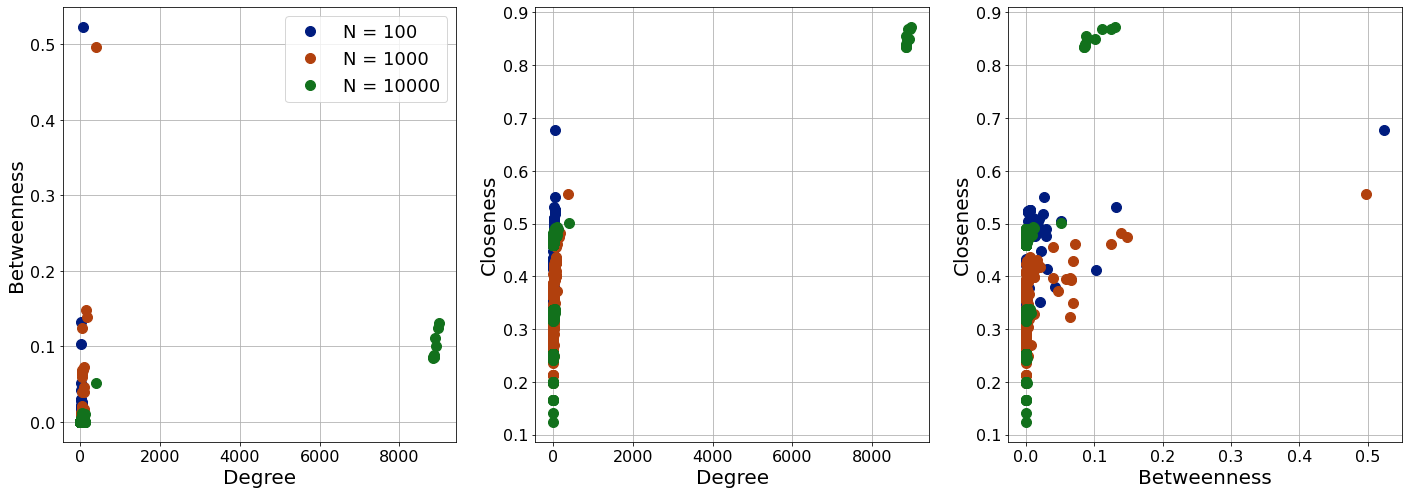

In [143]:
# Correlaciones

fig, axs = plt.subplots(1,3,figsize=(24,8))

idx = [3,6,9]

for i in idx :   
    btw_list = list(betweenness_data[i].values())
    clo_list = list(closeness_data[i].values())
    degree_list = list(dict(degree_data[i]).values())
    
    axs[0].plot(degree_list,btw_list,'o',markersize=10,label=f'N = {size_subgrafos[i]}')
    axs[1].plot(degree_list,clo_list,'o',markersize=10)
    axs[2].plot(btw_list,clo_list,'o',markersize=10)
    
axs[0].set_xlabel('Degree',fontsize=20)
axs[1].set_xlabel('Degree',fontsize=20)
axs[2].set_xlabel('Betweenness',fontsize=20)

axs[0].set_ylabel('Betweenness',fontsize=20)
axs[1].set_ylabel('Closeness',fontsize=20)
axs[2].set_ylabel('Closeness',fontsize=20)

axs[0].tick_params(axis='both', which='major', labelsize=16)
axs[1].tick_params(axis='both', which='major', labelsize=16)
axs[2].tick_params(axis='both', which='major', labelsize=16)

axs[0].legend(fontsize=18)

axs[0].grid()
axs[1].grid()
axs[2].grid()

Text(0, 0.5, 'Relative freq.')

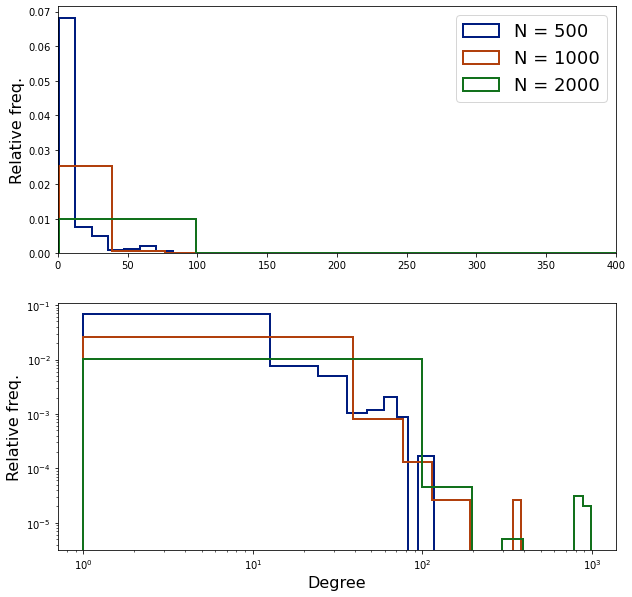

In [156]:
fig,axs = plt.subplots(2,1,figsize=(10,10))

idx = [5,6,7]

for i in idx:
    degree_list = list(dict(degree_data[i]).values())
    
    axs[0].hist(degree_list,density=True,histtype='step',linewidth=2,label=f'N = {size_subgrafos[i]}')
    axs[1].hist(degree_list,density=True,histtype='step',linewidth=2)

axs[1].set_yscale('log')
axs[1].set_xscale('log')

axs[0].set_xlim([0,400])

axs[0].legend(fontsize=18)

axs[1].set_xlabel('Degree',fontsize=16)
axs[0].set_ylabel('Relative freq.',fontsize=16)
axs[1].set_ylabel('Relative freq.',fontsize=16)
    